In [3]:
import pandas as pd 
import numpy as np 

kr_name = pd.read_csv("data/kr_babynames/y2018.txt", names=["name", "gender", "births"])

In [13]:
years = range(2008, 2020)
pieces = []
columns = ["name", "gender", "births"]

for year in years:
    path = "data/kr_babynames/y{}.txt".format(year)
    frame = pd.read_csv(path, names= columns)
    frame["year"] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index= True)   # 프레임끼리 합치기
names                

,name,gender,births,year
0,서연,F,3280,2008
1,민서,F,2873,2008
2,지민,F,2826,2008
3,서현,F,2606,2008
4,서윤,F,2484,2008
...,...,...,...,...
11995,민희,F,43,2019
11996,레아,F,43,2019
11997,이랑,F,43,2019
11998,가원,F,42,2019


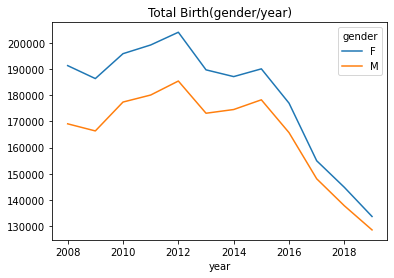

In [14]:
total_births = names.pivot_table("births", index= "year", columns= "gender", aggfunc= sum)  # 피봇테이블
total_births.plot(title= "Total Birth(gender/year)")

In [15]:
def add_prop(group):
    group["prop"] = group.births / group.births.sum()
    return group

In [16]:
names = names.groupby(["year", "gender"]).apply(add_prop)
names

,name,gender,births,year,prop
0,서연,F,3280,2008,0.017147
1,민서,F,2873,2008,0.015020
2,지민,F,2826,2008,0.014774
3,서현,F,2606,2008,0.013624
4,서윤,F,2484,2008,0.012986
...,...,...,...,...,...
11995,민희,F,43,2019,0.000322
11996,레아,F,43,2019,0.000322
11997,이랑,F,43,2019,0.000322
11998,가원,F,42,2019,0.000314


In [52]:
def get_top1000(group):
    return group.sort_values(by= "births", ascending= False)[:1000]

grouped = names.groupby(["year", "gender"])
top1000 = grouped.apply(get_top1000)
top1000

name gender  births  year      prop
year gender                                          
2008 F      0       서연      F    3280  2008  0.017147
            1       민서      F    2873  2008  0.015020
            2       지민      F    2826  2008  0.014774
            3       서현      F    2606  2008  0.013624
            4       서윤      F    2484  2008  0.012986
...                ...    ...     ...   ...       ...
2019 M      11495   현재      M      52  2019  0.000404
            11496   영광      M      52  2019  0.000404
            11497   영재      M      52  2019  0.000404
            11498   성원      M      52  2019  0.000404
            11499   혜준      M      52  2019  0.000404

[12000 rows x 5 columns]

In [53]:
top1000.reset_index(inplace=True, drop=True)
top1000

,name,gender,births,year,prop
0,서연,F,3280,2008,0.017147
1,민서,F,2873,2008,0.015020
2,지민,F,2826,2008,0.014774
3,서현,F,2606,2008,0.013624
4,서윤,F,2484,2008,0.012986
...,...,...,...,...,...
11995,현재,M,52,2019,0.000404
11996,영광,M,52,2019,0.000404
11997,영재,M,52,2019,0.000404
11998,성원,M,52,2019,0.000404


In [54]:
boys = top1000[top1000.gender == 'M']
girls = top1000[top1000.gender == 'F']
total_births = top1000.pivot_table("births", index= "year", columns= "name", aggfunc= sum)
ys = top1000[top1000.gender == 'M']
girls = top1000[top1000.gender == 'F']
total_births = top1000.pivot_table("births", index= "year", columns= "name", aggfunc= sum)
total_births

name,가람,가령,가민,가빈,가연,가영,가온,가원,가윤,가율,...,희영,희원,희윤,희은,희재,희정,희주,희준,희진,희찬
year,,,,,,,,,,,,,,,,,,,,,
2008,338.0,NaN,NaN,266.0,772.0,737.0,457.0,141.0,340.0,NaN,...,95.0,482.0,79.0,82.0,208.0,171.0,313.0,199.0,297.0,245.0
2009,218.0,NaN,107.0,348.0,664.0,642.0,536.0,153.0,406.0,NaN,...,66.0,481.0,87.0,83.0,160.0,147.0,228.0,159.0,228.0,228.0
2010,346.0,NaN,97.0,280.0,652.0,598.0,659.0,167.0,554.0,78.0,...,70.0,461.0,120.0,78.0,117.0,151.0,203.0,197.0,240.0,203.0
2011,438.0,99.0,93.0,285.0,584.0,525.0,775.0,153.0,734.0,116.0,...,NaN,452.0,112.0,NaN,116.0,101.0,194.0,228.0,186.0,184.0
2012,453.0,NaN,71.0,331.0,640.0,512.0,957.0,127.0,720.0,183.0,...,NaN,333.0,99.0,NaN,120.0,97.0,215.0,215.0,170.0,210.0
2013,372.0,92.0,83.0,269.0,467.0,425.0,880.0,131.0,782.0,171.0,...,NaN,230.0,76.0,NaN,97.0,65.0,183.0,191.0,117.0,163.0
2014,295.0,NaN,67.0,236.0,385.0,316.0,876.0,113.0,600.0,178.0,...,NaN,327.0,NaN,NaN,83.0,NaN,151.0,165.0,122.0,130.0
2015,310.0,NaN,71.0,216.0,348.0,233.0,1123.0,85.0,588.0,191.0,...,NaN,256.0,61.0,NaN,87.0,NaN,120.0,144.0,88.0,166.0
2016,329.0,NaN,63.0,321.0,339.0,198.0,865.0,96.0,500.0,205.0,...,NaN,230.0,NaN,NaN,78.0,NaN,75.0,146.0,73.0,162.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D67DC5F5B0>,
      dtype=object)

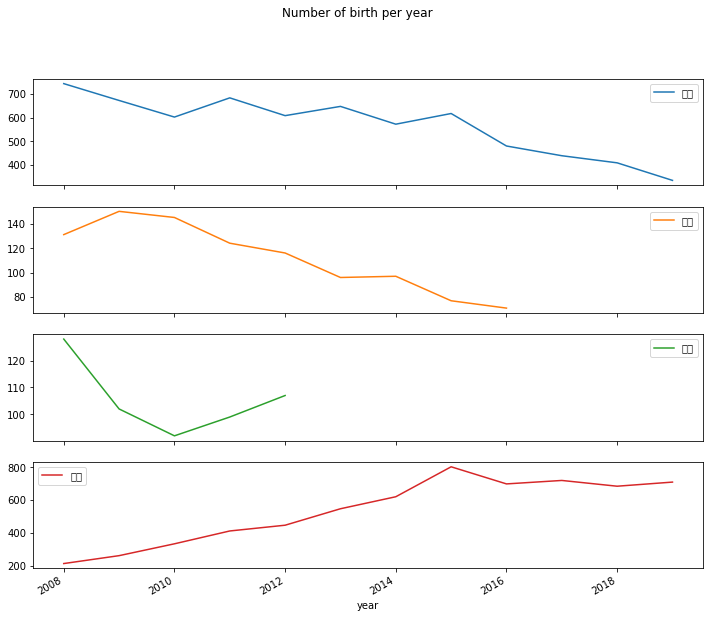

In [55]:
subset = total_births[["지성", "찬호", "형주", "세아"]]
subset.plot(subplots=True, figsize=(12,10), grid=False, title="Number of birth per year")

<Figure size 432x288 with 0 Axes>

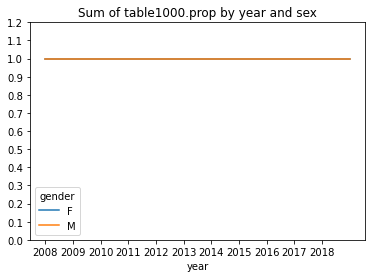

In [56]:
import matplotlib.pyplot as plt
plt.figure()
table = top1000.pivot_table("prop", index="year", columns="gender", aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(2008, 2019))

In [70]:
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/NGULIM.TTF'
font_family = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_family

In [61]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'gender']).apply(get_quantile_count)
diversity = diversity.unstack('gender')
type(diversity)
#fig = plt.figure()
#diversity.plot(title="Number of popular names in top 50%")

pandas.core.frame.DataFrame

In [66]:
# 마지막 글자의 변화
get_last_letter = lambda x : x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index= last_letters, columns=["gender", "year"], aggfunc= sum)
subtable = table.reindex(columns=[2008,2019], level="year")
subtable

gender            F               M        
year           2008    2019    2008    2019
last_letter                                
강               NaN     NaN   106.0    92.0
건               NaN     NaN  1755.0  1480.0
검               NaN     NaN     NaN     NaN
결             184.0     NaN  1159.0   835.0
겸               NaN   105.0    92.0   985.0
...             ...     ...     ...     ...
후             616.0   116.0  2049.0  3757.0
훈               NaN     NaN  7491.0  2569.0
훤               NaN     NaN     NaN     NaN
휘               NaN     NaN   285.0     NaN
희            6797.0  2998.0  2148.0   964.0

[128 rows x 4 columns]

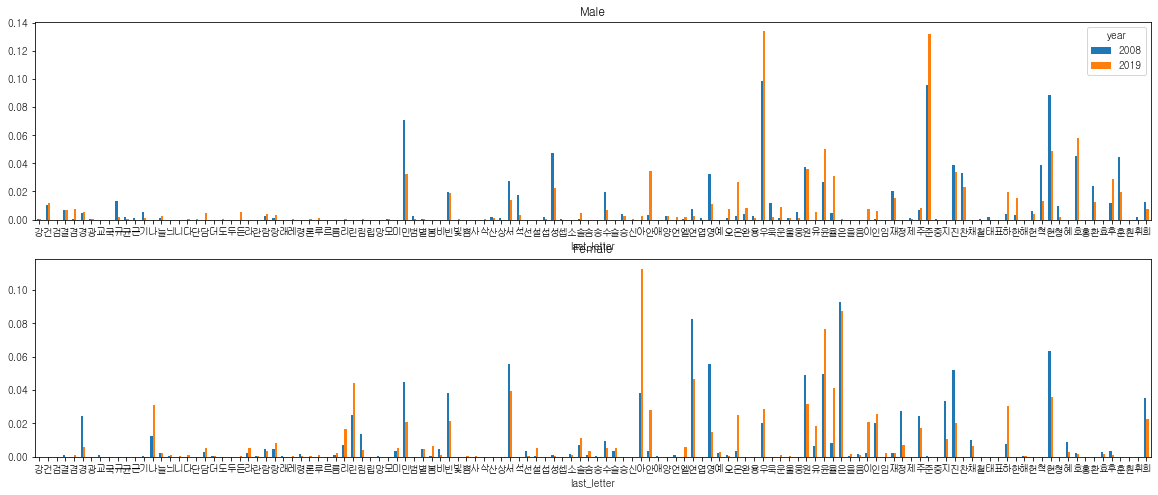

In [67]:
letter_prop = subtable / subtable.sum()
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(20, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [80]:
letter_prop = table/ table.sum()
dny_ts = letter_prop.loc[["서", "진", "아", "영"], 'M'].T
dny_ts

last_letter,서,진,아,영
year,,,,
2008,0.027605,0.038648,NaN,0.032343
2009,0.024605,0.033905,NaN,0.030088
2010,0.023171,0.030264,NaN,0.029564
2011,0.020916,0.030113,NaN,0.027825
2012,0.022104,0.027762,0.000539,0.025388
2013,0.022022,0.027094,0.000676,0.022640
2014,0.019923,0.028937,0.000705,0.020588
2015,0.020597,0.031319,0.000965,0.018751
2016,0.015843,0.030267,0.001340,0.016790


<Figure size 432x288 with 0 Axes>

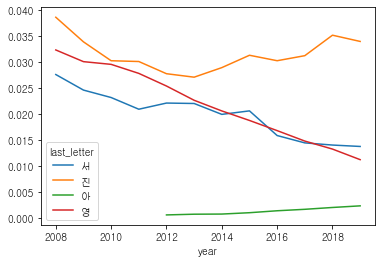

In [81]:
plt.close()
fig = plt.figure()
dny_ts.plot()